In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
usedcars_noisy = pd.read_excel("C:\\Users\\stoer\\projects\\Machine_learning\\usedcars_noisy.xlsx")

In [3]:
usedcars_noisy.head

<bound method NDFrame.head of      year model  price  mileage   color transmission
0    2011   SEL  21992     7413  Yellow         AUTO
1    2011   SEL  20995    10926    Gray         AUTO
2    2011   SEL  29995       -1    Gray         AUTO
3    2011   SEL  19995     7351  Silver         AUTO
4    2011   SEL  17809    11613    Gray         AUTO
..    ...   ...    ...      ...     ...          ...
155  2001    SE   4899   151479  Yellow         AUTO
156  2000    SE   3800   109259     Red         AUTO
157  2010   SES      0    16035     Red       MANUAL
158  2005   SES   8488       -1     Red         AUTO
159  2004    SE      0       -1  Silver         AUTO

[160 rows x 6 columns]>

In [4]:
usedcars_noisy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          160 non-null    int64 
 1   model         160 non-null    object
 2   price         160 non-null    int64 
 3   mileage       160 non-null    int64 
 4   color         160 non-null    object
 5   transmission  160 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.6+ KB


In [5]:
# When calculate the mean price, be careful choose the non-zero car prices
# This is wrong: 
# mean_price = usedcars_noisy['price'].mean()
# print(mean_price)

In [6]:
# Replace '0' with mean price
# This will not work: because Pandas will not fill '0'
# usedcars_noisy['price'].fillna(usedcars_noisy['price'].mean(), inplace=True)

# The following is right, apply()
mean_price = usedcars_noisy[usedcars_noisy['price'] != 0]['price'].mean()
usedcars_noisy['price'] = usedcars_noisy['price'].apply(lambda x: mean_price if x == 0 else x)
# This also works:
#usedcars_noisy['price'] = usedcars_noisy['price'].replace(0, mean_price)

In [7]:
usedcars_noisy.head

<bound method NDFrame.head of      year model         price  mileage   color transmission
0    2011   SEL  21992.000000     7413  Yellow         AUTO
1    2011   SEL  20995.000000    10926    Gray         AUTO
2    2011   SEL  29995.000000       -1    Gray         AUTO
3    2011   SEL  19995.000000     7351  Silver         AUTO
4    2011   SEL  17809.000000    11613    Gray         AUTO
..    ...   ...           ...      ...     ...          ...
155  2001    SE   4899.000000   151479  Yellow         AUTO
156  2000    SE   3800.000000   109259     Red         AUTO
157  2010   SES  13127.793548    16035     Red       MANUAL
158  2005   SES   8488.000000       -1     Red         AUTO
159  2004    SE  13127.793548       -1  Silver         AUTO

[160 rows x 6 columns]>

In [8]:
# Calculate the median mileage of all cars
non_minus1_mileage = usedcars_noisy[usedcars_noisy['mileage'] != -1]['mileage']
median_mileage = non_minus1_mileage.median()
print(median_mileage)


36323.0


In [9]:
# Replace '-1' with median mileage
usedcars_noisy['mileage'] = usedcars_noisy['mileage'].replace(-1, median_mileage)

In [10]:
usedcars_noisy.to_csv('usedcars_clean.csv', index=False)

In [11]:
usedcars_clean=pd.read_csv('usedcars_clean.csv')
print(usedcars_clean)

     year model         price  mileage   color transmission
0    2011   SEL  21992.000000     7413  Yellow         AUTO
1    2011   SEL  20995.000000    10926    Gray         AUTO
2    2011   SEL  29995.000000    36323    Gray         AUTO
3    2011   SEL  19995.000000     7351  Silver         AUTO
4    2011   SEL  17809.000000    11613    Gray         AUTO
..    ...   ...           ...      ...     ...          ...
155  2001    SE   4899.000000   151479  Yellow         AUTO
156  2000    SE   3800.000000   109259     Red         AUTO
157  2010   SES  13127.793548    16035     Red       MANUAL
158  2005   SES   8488.000000    36323     Red         AUTO
159  2004    SE  13127.793548    36323  Silver         AUTO

[160 rows x 6 columns]


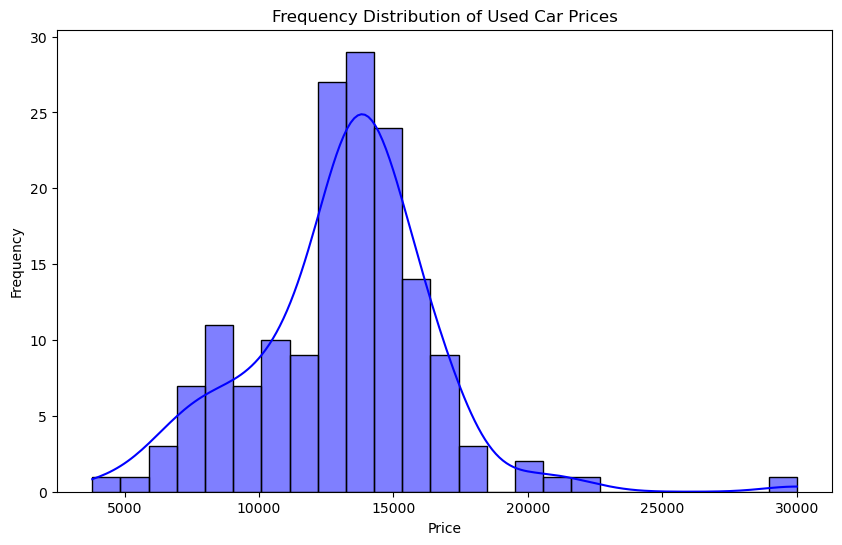

In [14]:
# Create a histogram plot for price
plt.figure(figsize=(10, 6))
sns.histplot(data=usedcars_clean, x='price', bins=25, color='blue', kde=True)
# Simple histogram
# plt.hist(usedcars_clean['price'], bins=20, color='purple', edgecolor='black')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Used Car Prices')

plt.show()

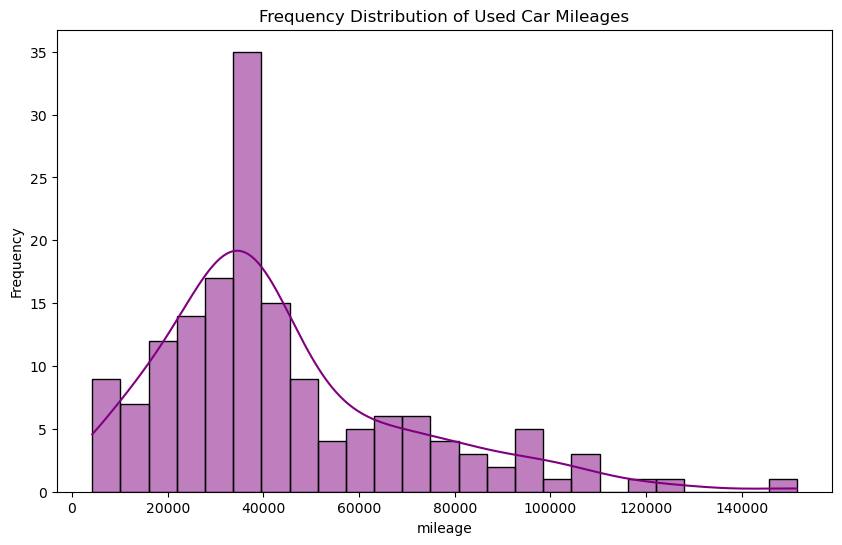

In [15]:
# Create a histogram plot for mileage
plt.figure(figsize=(10, 6))
sns.histplot(data=usedcars_clean, x='mileage', bins=25, color='purple', kde=True)
# Simple histogram
# plt.hist(usedcars_clean['price'], bins=20, color='purple', edgecolor='black')

plt.xlabel('mileage')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Used Car Mileages')

plt.show()